# IMAGE NORMALIZATION

## Importing Required/Necessary Modules

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

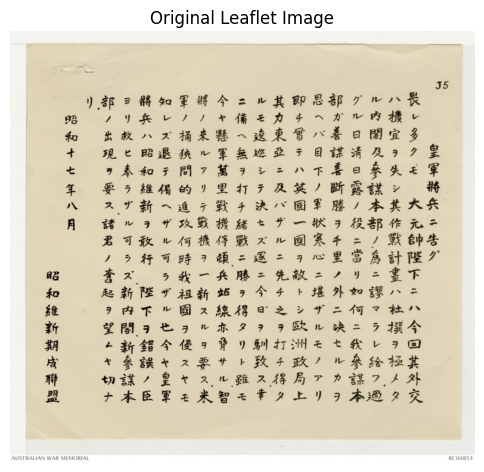

In [9]:
# Read image from file
image = cv2.imread("images/Group_1/J5.png")

# Convert BGR (OpenCV format) to RGB (matplotlib format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(6,6))
plt.imshow(image_rgb)
plt.title("Original Leaflet Image")
plt.axis("off")
plt.show()

## Applying the Image Normalization Pipeline Techniques

In [10]:
# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Denoise the image/ also known as the Background Noise Removal
denoised = cv2.fastNlMeansDenoising(gray, h=10)

# I think we can change between the h=30 values to know that how 

# Apply CLAHE for local contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(denoised)



"""CLAHE = Contrast Limited Adaptive Histogram Equalization

What it does: Enhances contrast locally in small blocks of the image.

Why: Useful for images where lighting is uneven or faded — like historical documents or handwritten notes.

clipLimit: Prevents over-enhancement of noise.

tileGridSize: Splits image into small tiles (e.g., 8x8) and equalizes each region."""



'CLAHE = Contrast Limited Adaptive Histogram Equalization\n\nWhat it does: Enhances contrast locally in small blocks of the image.\n\nWhy: Useful for images where lighting is uneven or faded — like historical documents or handwritten notes.\n\nclipLimit: Prevents over-enhancement of noise.\n\ntileGridSize: Splits image into small tiles (e.g., 8x8) and equalizes each region.'

In [11]:
# Binarize using Otsu's thresholding
_, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [19]:
# Normalize pixel values to 0–1
normalized = binary / 255.0

# added padded image feature to make it more consistent.
padded = cv2.copyMakeBorder(
    normalized, 20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[255,255,255]
)


## Visualizing all the images 

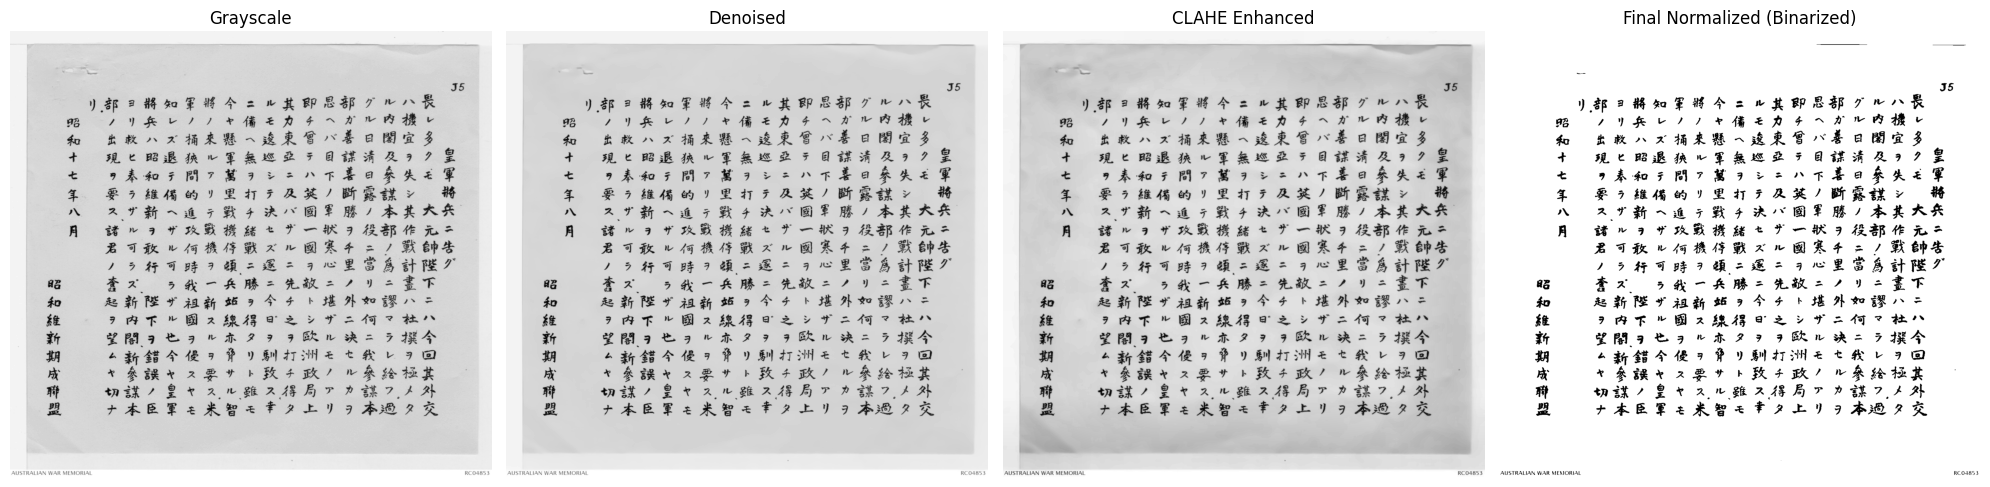

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(20,5))

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Grayscale')

axs[1].imshow(denoised, cmap='gray')
axs[1].set_title('Denoised')

axs[2].imshow(enhanced, cmap='gray')
axs[2].set_title('CLAHE Enhanced')

axs[3].imshow(normalized, cmap='gray')
axs[3].set_title('Final Normalized (Binarized)')

axs[4].imshow(padded, cmap='gray')


for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Saving the final image

In [14]:
# Convert normalized image back to uint8 (0–255) if needed
final_output = (normalized * 255).astype('uint8')

# Save to desired location
cv2.imwrite("images/Group_1_Normalized/J5_normalized.png", final_output)

True